<a href="https://colab.research.google.com/github/mukul9155/Cardiovascular-disease-prediction/blob/main/Cardiovasular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Importing libraries
import pandas as pd 
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as seabornInstance
from pandas.plotting import scatter_matrix

# Importing machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [109]:
from google.colab import drive

In [62]:
path = '/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk.csv'

In [63]:
data = pd.read_csv(path)

In [64]:
data = pd.DataFrame(data)

In [65]:
data.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

In [66]:
data.shape

(3390, 17)

In [67]:
df = data.copy()

In [68]:
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [69]:
# Checking the null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [70]:
df.drop('id',axis=1, inplace=True)
df.drop('education',axis=1, inplace=True)

In [71]:
df

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   F        YES         3.0     0.0                0             0   
1      36   M         NO         0.0     0.0                0             1   
2      46   F        YES        10.0     0.0                0             0   
3      50   M        YES        20.0     0.0                0             1   
4      64   F        YES        30.0     0.0                0             0   
...   ...  ..        ...         ...     ...              ...           ...   
3385   60   F         NO         0.0     0.0                0             0   
3386   46   F         NO         0.0     0.0                0             0   
3387   44   M        YES         3.0     0.0                0             1   
3388   60   M         NO         0.0     NaN                0             1   
3389   54   F         NO         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1            0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2            0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3            0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4            0    241.0  136.5   85.0  26.42       70.0     77.0           0  
...        ...      ...    ...    ...    ...        ...      ...         ...  
3385         0    261.0  123.5   79.0  29.28       70.0    103.0           0  
3386         0    199.0  102.0   56.0  21.96       80.0     84.0           0  
3387         0    352.0  164.0  119.0  28.92       73.0     72.0           1  
3388         0    191.0  167.0  105.0  23.01       80.0     85.0           0  
3389         0    288.0  124.0   77.0  29.88       79.0     92.0           0  

[3390 rows x 15 columns]

In [72]:
df['sex'].replace({'M':'1','F':'0'}, inplace = True)

In [73]:
df['is_smoking'].replace({'YES':'1','NO':'0'}, inplace = True)

In [74]:
df

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   0          1         3.0     0.0                0             0   
1      36   1          0         0.0     0.0                0             1   
2      46   0          1        10.0     0.0                0             0   
3      50   1          1        20.0     0.0                0             1   
4      64   0          1        30.0     0.0                0             0   
...   ...  ..        ...         ...     ...              ...           ...   
3385   60   0          0         0.0     0.0                0             0   
3386   46   0          0         0.0     0.0                0             0   
3387   44   1          1         3.0     0.0                0             1   
3388   60   1          0         0.0     NaN                0             1   
3389   54   0          0         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1            0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2            0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3            0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4            0    241.0  136.5   85.0  26.42       70.0     77.0           0  
...        ...      ...    ...    ...    ...        ...      ...         ...  
3385         0    261.0  123.5   79.0  29.28       70.0    103.0           0  
3386         0    199.0  102.0   56.0  21.96       80.0     84.0           0  
3387         0    352.0  164.0  119.0  28.92       73.0     72.0           1  
3388         0    191.0  167.0  105.0  23.01       80.0     85.0           0  
3389         0    288.0  124.0   77.0  29.88       79.0     92.0           0  

[3390 rows x 15 columns]

In [75]:
df = df.dropna()

In [76]:
df.shape

(3004, 15)

In [77]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

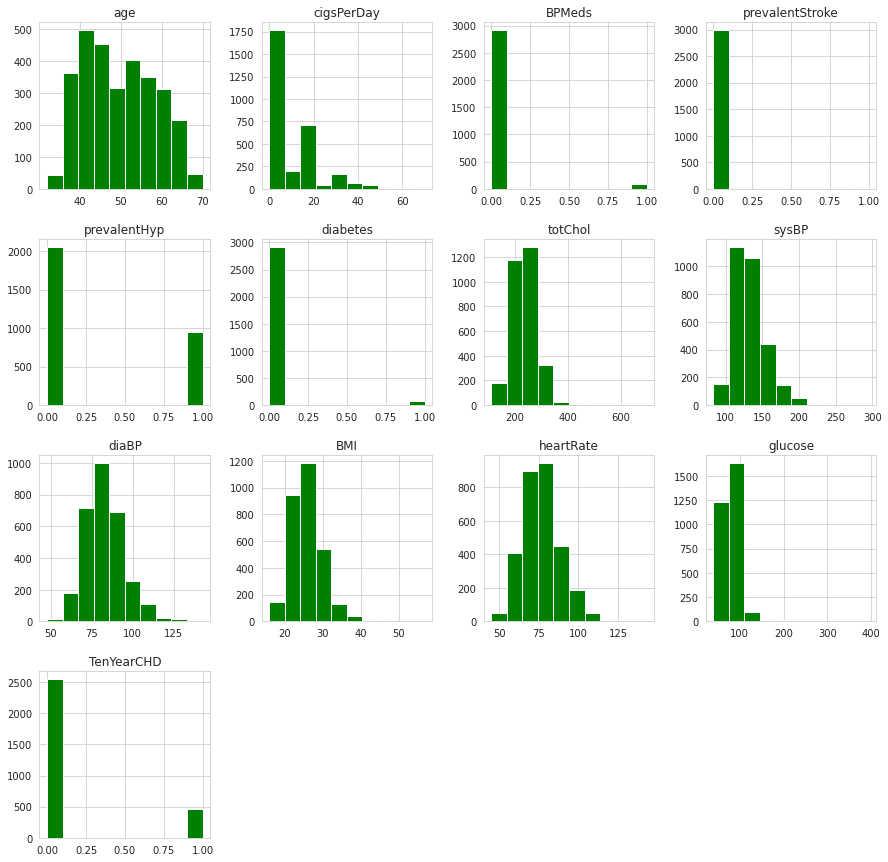

In [78]:
df.hist(figsize=(15,15),color='g')
plt.show()

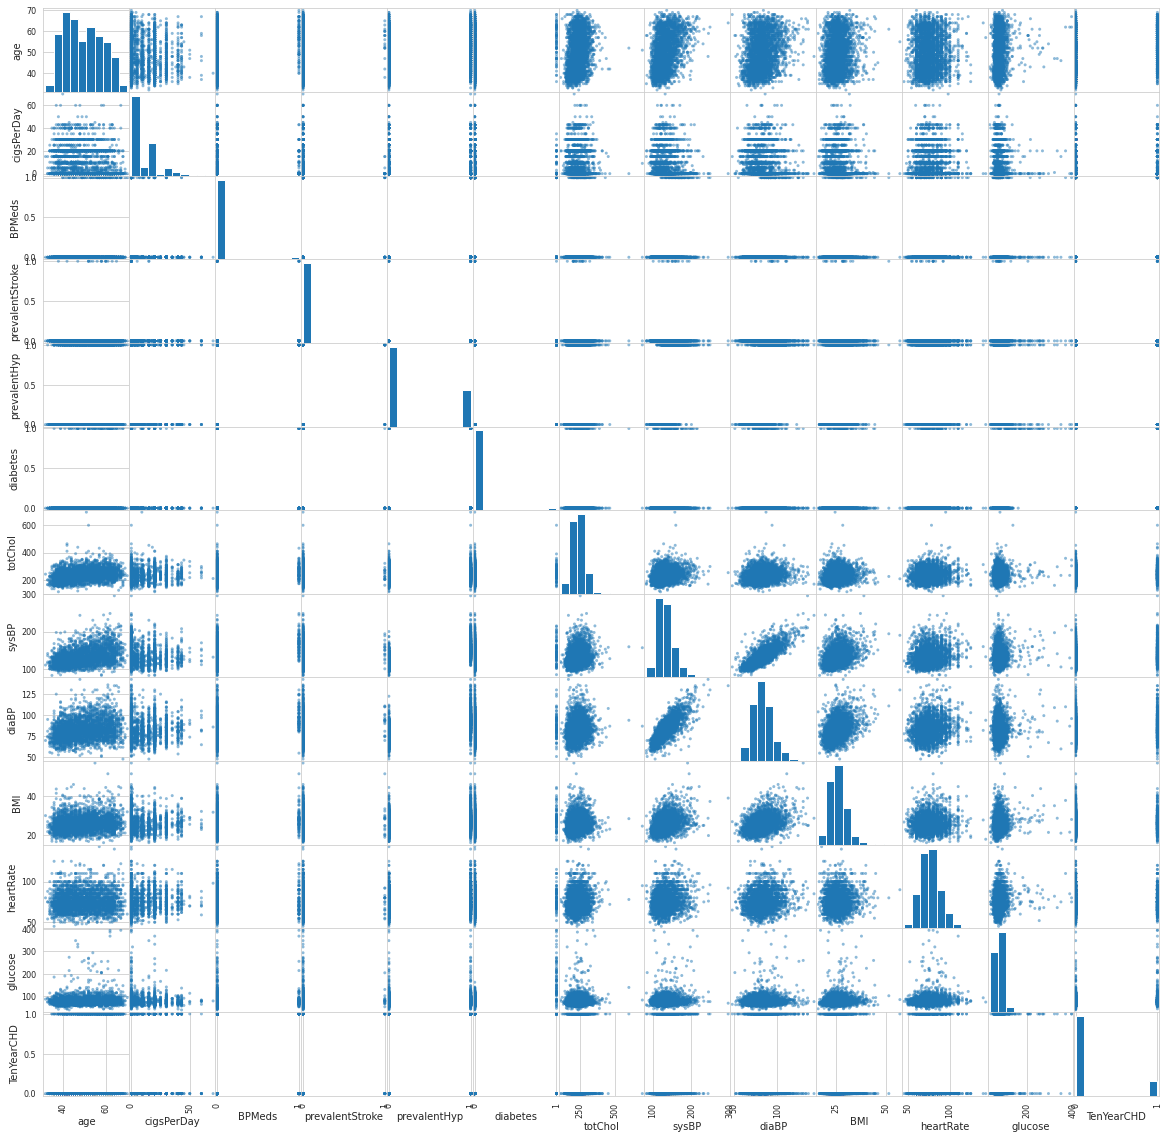

In [79]:
scatter_matrix(df, figsize=(20,20))
plt.show()

In [80]:
# Finding the corelation of the data 
df.corr()

age  cigsPerDay    BPMeds  prevalentStroke  \
age              1.000000   -0.185938  0.135508         0.048996   
cigsPerDay      -0.185938    1.000000 -0.037272        -0.046590   
BPMeds           0.135508   -0.037272  1.000000         0.112111   
prevalentStroke  0.048996   -0.046590  0.112111         1.000000   
prevalentHyp     0.310227   -0.078206  0.260692         0.058798   
diabetes         0.112029   -0.051627  0.077668         0.013465   
totChol          0.274599   -0.025286  0.092726         0.002192   
sysBP            0.402750   -0.102654  0.279223         0.061183   
diaBP            0.227066   -0.066650  0.206065         0.058909   
BMI              0.139114   -0.097959  0.089444         0.028345   
heartRate        0.009960    0.060842  0.011825        -0.017963   
glucose          0.109860   -0.064884  0.066319         0.020944   
TenYearCHD       0.231329    0.066510  0.087372         0.051183   

                 prevalentHyp  diabetes   totChol     sysBP     diaBP  \
age                  0.310227  0.112029  0.274599  0.402750  0.227066   
cigsPerDay          -0.078206 -0.051627 -0.025286 -0.102654 -0.066650   
BPMeds               0.260692  0.077668  0.092726  0.279223  0.206065   
prevalentStroke      0.058798  0.013465  0.002192  0.061183  0.058909   
prevalentHyp         1.000000  0.084347  0.161685  0.699151  0.611798   
diabetes             0.084347  1.000000  0.067154  0.111516  0.059457   
totChol              0.161685  0.067154  1.000000  0.207890  0.159637   
sysBP                0.699151  0.111516  0.207890  1.000000  0.783036   
diaBP                0.611798  0.059457  0.159637  0.783036  1.000000   
BMI                  0.305000  0.095808  0.113176  0.338724  0.389107   
heartRate            0.151095  0.050840  0.094119  0.179230  0.170581   
glucose              0.084696  0.618810  0.063023  0.133070  0.072780   
TenYearCHD           0.165798  0.099689  0.104759  0.213669  0.137392   

                      BMI  heartRate   glucose  TenYearCHD  
age              0.139114   0.009960  0.109860    0.231329  
cigsPerDay      -0.097959   0.060842 -0.064884    0.066510  
BPMeds           0.089444   0.011825  0.066319    0.087372  
prevalentStroke  0.028345  -0.017963  0.020944    0.051183  
prevalentHyp     0.305000   0.151095  0.084696    0.165798  
diabetes         0.095808   0.050840  0.618810    0.099689  
totChol          0.113176   0.094119  0.063023    0.104759  
sysBP            0.338724   0.179230  0.133070    0.213669  
diaBP            0.389107   0.170581  0.072780    0.137392  
BMI              1.000000   0.075289  0.095579    0.075374  
heartRate        0.075289   1.000000  0.094031    0.021564  
glucose          0.095579   0.094031  1.000000    0.134573  
TenYearCHD       0.075374   0.021564  0.134573    1.000000

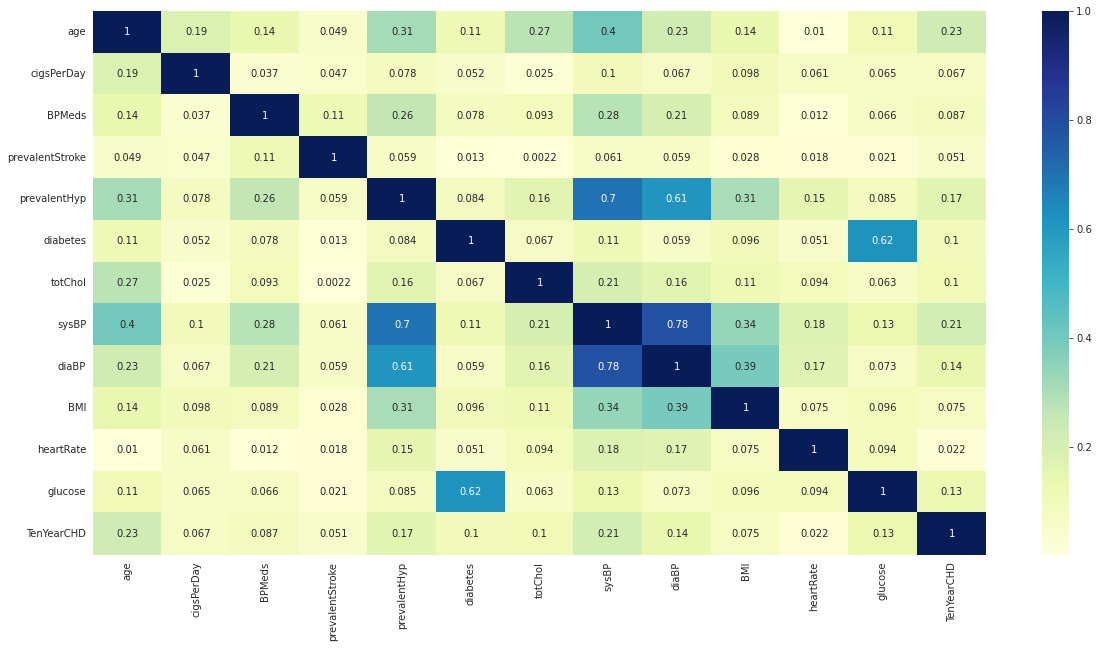

In [81]:
# showing the corelation with graph
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')
plt.show()

sysBP and diaBP, sysBP and prevalentHyp are highly corelated.

In [82]:
# Finding the CHD patients 
df['TenYearCHD'].value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

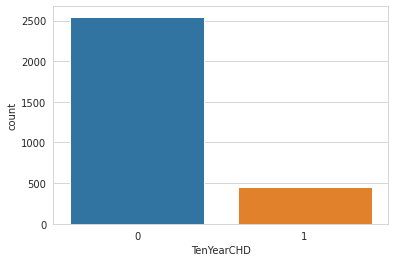

In [83]:
sns.countplot(df['TenYearCHD'])
plt.show()

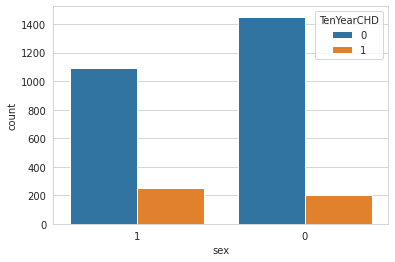

In [84]:
sns.countplot(data=df, x='sex', hue='TenYearCHD')
plt.show()

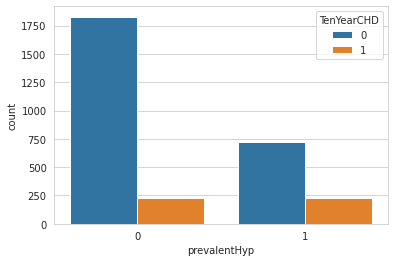

In [85]:
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')
plt.show()

Higher percentage of people having hypertension suffer from CHD

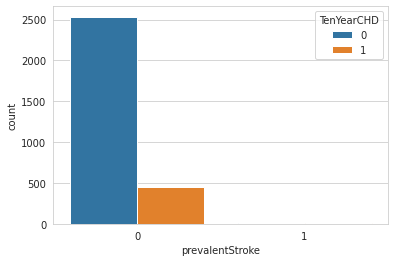

In [86]:
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.show()

There is no any patients having prevalent stroke

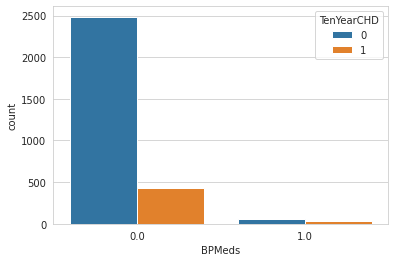

In [87]:
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD')
plt.show()

It seems that 40-50% of patients taking BPMeds get CHD

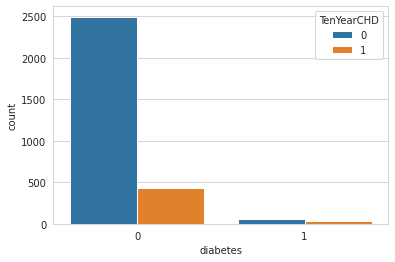

In [88]:
sns.countplot(data=df, x='diabetes', hue='TenYearCHD')
plt.show()

It seems that 70-80% of patients taking BPMeds get CHD

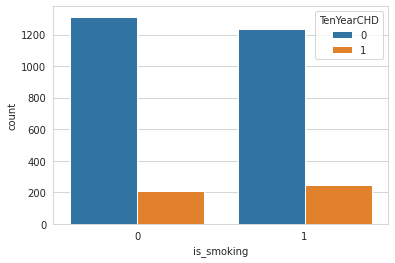

In [89]:
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD')
plt.show()

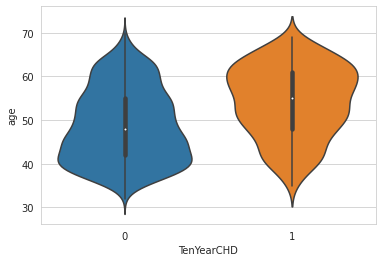

In [90]:
sns.violinplot(y='age',x='TenYearCHD',data=df)

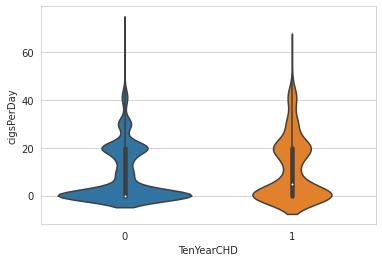

In [91]:
sns.violinplot(y='cigsPerDay',x='TenYearCHD',data=df)

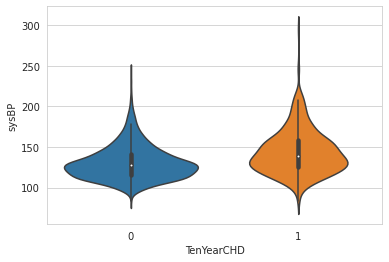

In [92]:
sns.violinplot(y='sysBP',x='TenYearCHD',data=df)

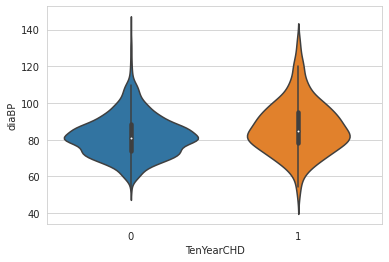

In [93]:
sns.violinplot(y='diaBP',x='TenYearCHD',data=df)

In [94]:
print('Percentage of patients with heart disase:{:.2f}%'.format(len(df[df.TenYearCHD==1])*100/len(df.TenYearCHD)))

Percentage of patients with heart disase:15.21%


In [95]:
print('Percentage of patients with no heart disase:{:.2f}%'.format(len(df[df.TenYearCHD==0])*100/len(df.TenYearCHD)))

Percentage of patients with no heart disase:84.79%


In [96]:
df.sex.value_counts()

0    1657
1    1347
Name: sex, dtype: int64

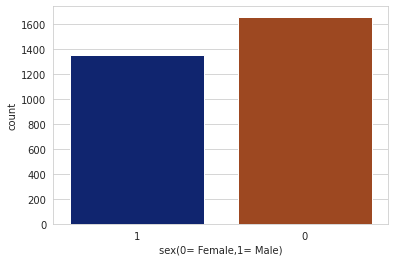

In [97]:
sns.countplot(x='sex',data=df,palette='dark')
#plt.legend('Female','Male')
plt.xlabel('sex(0= Female,1= Male)')
plt.show()

In [98]:
x = df.drop(['TenYearCHD'],axis=1)
y = df.TenYearCHD.values

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [100]:
accuracies = {}

In [101]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression']= acc
acc

83.69384359400999

In [102]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
acc = knn.score(x_test, y_test)*100
accuracies['KNN']= acc
acc

82.02995008319468

In [103]:
svm = SVC(random_state=1)
svm.fit(x_train, y_train)
acc = svm.score(x_test, y_test)*100
accuracies['SVM']= acc
acc

83.36106489184692

In [104]:
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test, y_test)*100
accuracies['Naive Bayes']= acc
acc

81.36439267886855

In [105]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree']= acc
acc

76.37271214642263

In [106]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train, y_train)
acc = rf.score(x_test, y_test)*100
accuracies['Random Forest']= acc
acc

83.36106489184692

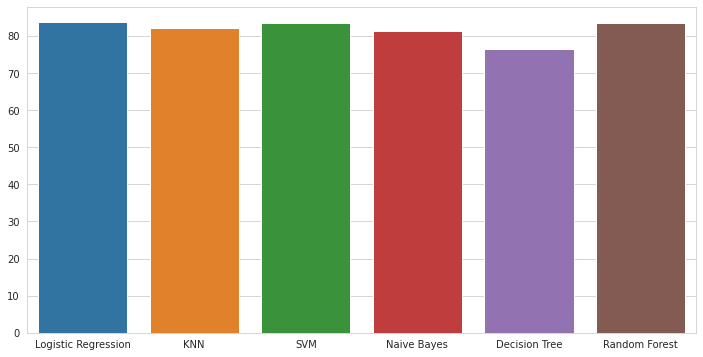

In [107]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()